In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
import skgstat as skg

In [3]:
cwd = "c:\\Users\\m1865\\Desktop\\DISC"
cwd_Images_Raw = cwd + "\\Sentinel-2 Images Raw"
cwd_Images_Processed = cwd + "\\Sentinel-2 Images Processed"

In [4]:
# Read Albedo raster image
img_1000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 1000m.tif")
# img_1000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 1000m RE.tif")
band_1000 = img_1000.read(1)
band_1000.shape

(101, 101)

In [5]:
# Read Albedo raster image
img_1500 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 1500m.tif")
band_1500 = img_1500.read(1)
band_1500.shape

(151, 151)

In [6]:
# Read Albedo raster image
img_2000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 3000m RE.tif")
# img_2000 = rio.open(cwd_Images_Processed + "\\Australia\\Albedo Litch 3000m.tif")
band_2000 = img_2000.read(1)
band_2000.shape

(150, 150)

In [7]:
# reshape the band arrays into one-dimensional array
band_1000_reshape = band_1000.reshape(-1)
band_1500_reshape = band_1500.reshape(-1)
band_2000_reshape = band_2000.reshape(-1)

In [8]:
# Get the coordinates n-dimensional array
list_Coordinates_1000 = []
for x in range(img_1000.shape[0]):
    for y in range(img_1000.shape[1]):
        temp_x, temp_y = img_1000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1000.append(temp_list)
arr_Coordinates_1000 = np.array(list_Coordinates_1000)
arr_Coordinates_1000

array([[ 694585., 8542755.],
       [ 694595., 8542755.],
       [ 694605., 8542755.],
       ...,
       [ 695565., 8541755.],
       [ 695575., 8541755.],
       [ 695585., 8541755.]])

In [9]:
list_Coordinates_1500 = []
for x in range(img_1500.shape[0]):
    for y in range(img_1500.shape[1]):
        temp_x, temp_y = img_1500.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_1500.append(temp_list)
arr_Coordinates_1500 = np.array(list_Coordinates_1500)
arr_Coordinates_1500

array([[ 694335., 8543005.],
       [ 694345., 8543005.],
       [ 694355., 8543005.],
       ...,
       [ 695815., 8541505.],
       [ 695825., 8541505.],
       [ 695835., 8541505.]])

In [10]:
list_Coordinates_2000 = []
for x in range(img_2000.shape[0]):
    for y in range(img_2000.shape[1]):
        temp_x, temp_y = img_2000.xy(x, y)
        temp_list = [temp_x, temp_y]
        list_Coordinates_2000.append(temp_list)
arr_Coordinates_2000 = np.array(list_Coordinates_2000)
arr_Coordinates_2000

array([[ 693590.03333333, 8543749.96666667],
       [ 693610.1       , 8543749.96666667],
       [ 693630.16666667, 8543749.96666667],
       ...,
       [ 696539.83333333, 8540760.03333333],
       [ 696559.9       , 8540760.03333333],
       [ 696579.96666667, 8540760.03333333]])

In [11]:
# Get the maximum lag
diagonal_1000 = 1000 * (2 ** 0.5) / 2
bin_1000 = np.arange(10,diagonal_1000,20)
bin_1000[-1]

690.0

In [12]:
# Get the maximum lag
diagonal_1500 = 1500 * (2 ** 0.5) / 2
bin_1500 = np.arange(10,diagonal_1500,30)
bin_1500[-1]

1060.0

In [13]:
# Get the maximum lag
diagonal_2000 = 2000 * (2 ** 0.5) / 2
bin_2000 = np.arange(10,diagonal_2000,30)
bin_2000[-1]

1390.0

In [14]:
V_1000 = skg.Variogram(arr_Coordinates_1000, band_1000_reshape, use_nugget=True, bin_func=bin_1000, maxlag = bin_1000[-1])
V_1000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 476099.9999780086,
 'normalized_sill': 1.6586454825690435e-09,
 'normalized_nugget': 1.6686139193916587e-09,
 'effective_range': 689.9999999681285,
 'sill': 2.862137653982224e-05,
 'nugget': 2.879339062409273e-05,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 690.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

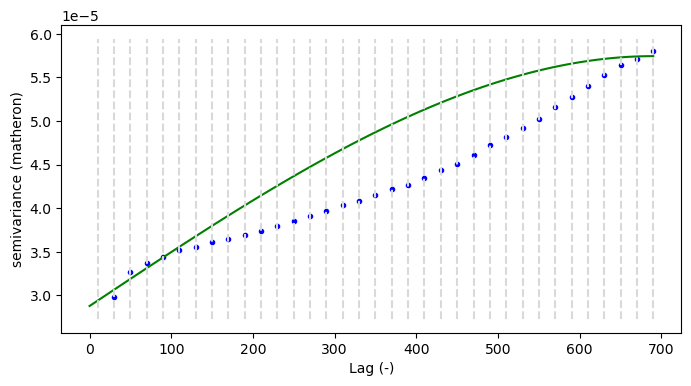

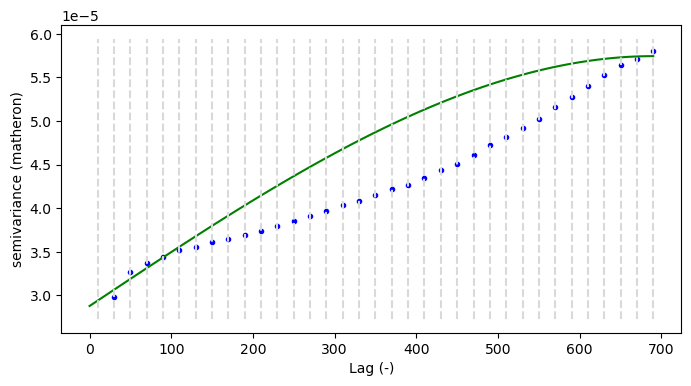

In [15]:
V_1000.plot(show = False, hist = False)

In [22]:
V_1500 = skg.Variogram(arr_Coordinates_1500, band_1500_reshape, use_nugget=True, bin_func=bin_1500, maxlag = bin_1500[-1])
V_1500.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 1123599.999946764,
 'normalized_sill': 2.3226131649445413e-09,
 'normalized_nugget': 2.3460264994085573e-09,
 'effective_range': 1059.9999999497772,
 'sill': 3.4112190587413386e-05,
 'nugget': 3.445606193869045e-05,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1060.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

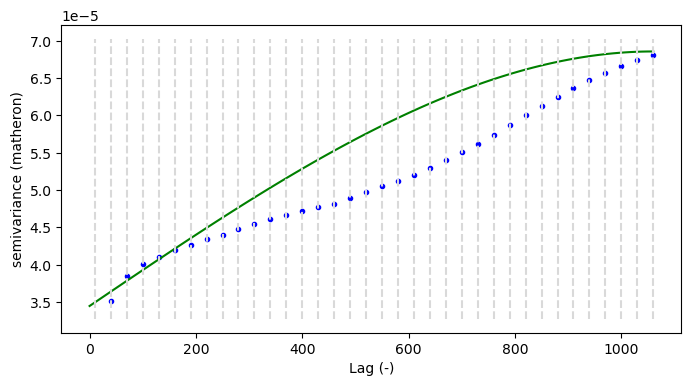

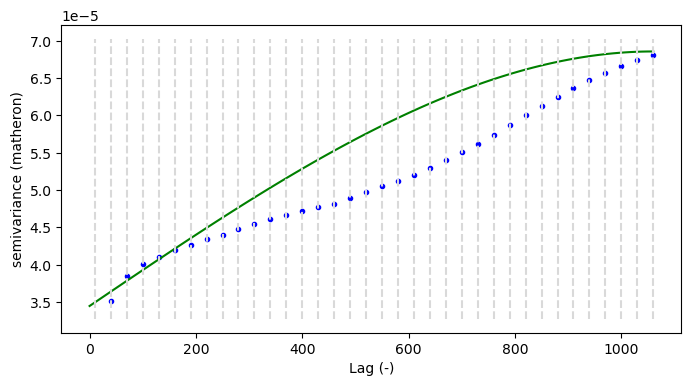

In [23]:
V_1500.plot(show = False, hist = False)

In [18]:
V_2000 = skg.Variogram(arr_Coordinates_2000, band_2000_reshape, use_nugget=True, bin_func=bin_2000, maxlag = bin_2000[-1])
V_2000.describe()

{'model': 'spherical',
 'estimator': 'matheron',
 'dist_func': 'euclidean',
 'normalized_effective_range': 1932099.999885858,
 'normalized_sill': 3.3734374161895937e-09,
 'normalized_nugget': 3.855019304493154e-09,
 'effective_range': 1389.9999999178835,
 'sill': 4.1757527182340507e-05,
 'nugget': 4.771870751870889e-05,
 'params': {'estimator': 'matheron',
  'model': 'spherical',
  'dist_func': 'euclidean',
  'bin_func': 'custom_bin_edges',
  'normalize': False,
  'fit_method': 'trf',
  'fit_sigma': None,
  'use_nugget': True,
  'maxlag': 1390.0,
  'n_lags': 10,
  'verbose': False},
 'kwargs': {}}

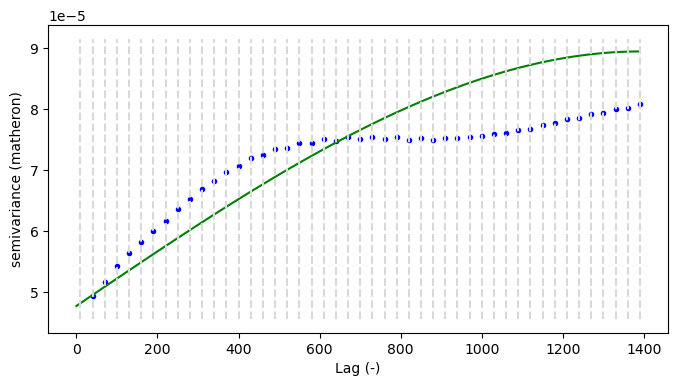

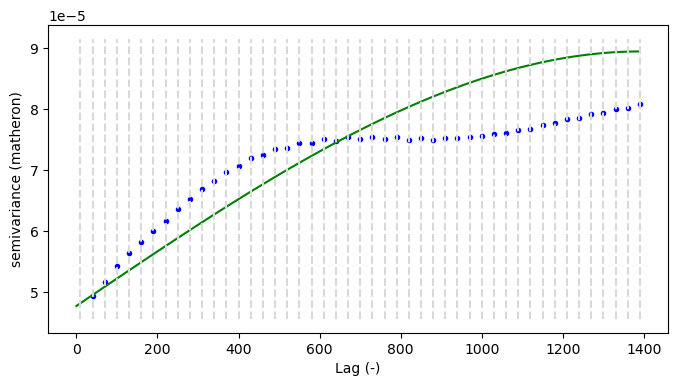

In [19]:
V_2000.plot(show = False, hist = False)